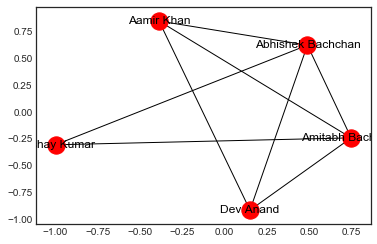

In [4]:
import networkx as nx
G_symmetric = nx.Graph()
G_symmetric.add_edge('Amitabh Bachchan','Abhishek Bachchan')
G_symmetric.add_edge('Amitabh Bachchan','Aamir Khan')
G_symmetric.add_edge('Amitabh Bachchan','Akshay Kumar')
G_symmetric.add_edge('Amitabh Bachchan','Dev Anand')
G_symmetric.add_edge('Abhishek Bachchan','Aamir Khan')
G_symmetric.add_edge('Abhishek Bachchan','Akshay Kumar')
G_symmetric.add_edge('Abhishek Bachchan','Dev Anand')
G_symmetric.add_edge('Dev Anand','Aamir Khan')
nx.draw_networkx(G_symmetric)
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')
G_asymmetric.add_edge('A','E')

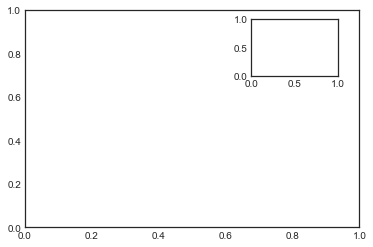

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

Undirected Graph
Menu
add vertex <key>
add edge <src> <dest> <weight>
mst
display
quit
[[ 44 166  86 148 191  63  93  25 137 160]
 [ 76 162  54  13 148  94  89 125  34  44]
 [ 41 135   9 180  11  86 187  69  67  96]
 [ 50 118 157  56 127 164 127  92 163   6]
 [145  94  63  93 106 196 171 198 137  93]
 [ 25 199 140 179 172  48 184 147  71 192]
 [140 168 158  29 175 178  84 107 152 150]
 [ 85  35  69 188 133  37  66 145  17 128]
 [ 41  52 155   7  13  54 156 114  79  66]
 [ 91  68 144 115  91  31  49   9  65 132]]
Waktu Minimum Spanning Tree:0.000998
Total nilai sapnning= 425 dan jumlah edge= 11
Jalur terpendek dari node : 0 ke 9:  ['0', '7', '2', '1', '9']
weight dari  0  ke  7  =  25
weight dari  7  ke  2  =  69
weight dari  2  ke  1  =  135
weight dari  1  ke  9  =  44


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


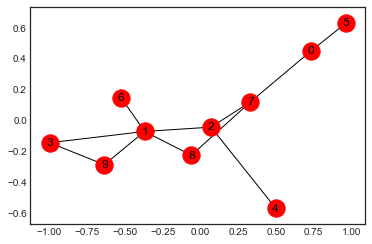

In [6]:
import networkx as nx
import numpy as np
import sys
import time

class Graph:
    def __init__(self):
        # dictionary containing keys that map to the corresponding vertex object
        self.vertices = {}
 
    def add_vertex(self, key):
        """Add a vertex with the given key to the graph."""
        vertex = Vertex(key)
        self.vertices[key] = vertex
 
    def get_vertex(self, key):
        """Return vertex object with the corresponding key."""
        return self.vertices[key]
 
    def __contains__(self, key):
        return key in self.vertices
 
    def add_edge(self, src_key, dest_key, weight=1):
        """Add edge from src_key to dest_key with given weight."""
        self.vertices[src_key].add_neighbour(self.vertices[dest_key], weight)
 
    def does_vertex_exist(self, key):
        return key in self.vertices
 
    def does_edge_exist(self, src_key, dest_key):
        """Return True if there is an edge from src_key to dest_key."""
        return self.vertices[src_key].does_it_point_to(self.vertices[dest_key])
 
    def display(self):
        #print('Vertices: ', end='')
        #for v in self:
        #    print(v.get_key(), end=' ')
        #print()
        list_edge = []
 
        #print('Edges: ')
        G_symmetric = nx.Graph()
        tot_w = 0
        tot_edge = 0
        for v in self:
            for dest in v.get_neighbours():
                w = v.get_weight(dest)
                if (int(v.get_key()) < int(dest.get_key())): 
                    edge = []
                    tot_w += w
                    tot_edge += 1
                    edge.append(v.get_key())
                    edge.append(dest.get_key())
                    edge.append(w)
                    #print('(src={}, dest={}, weight={}) '.format(v.get_key(),
                    #                                         dest.get_key(), w))
                    list_edge.append(edge)
        print("Total nilai sapnning= %d dan jumlah edge= %d"%(tot_w,tot_edge))
        return list_edge
                
    def __len__(self):
        return len(self.vertices)
 
    def __iter__(self):
        return iter(self.vertices.values())
 
 
class Vertex:
    def __init__(self, key):
        self.key = key
        self.points_to = {}
 
    def get_key(self):
        """Return key corresponding to this vertex object."""
        return self.key
 
    def add_neighbour(self, dest, weight):
        """Make this vertex point to dest with given edge weight."""
        self.points_to[dest] = weight
 
    def get_neighbours(self):
        """Return all vertices pointed to by this vertex."""
        return self.points_to.keys()
 
    def get_weight(self, dest):
        """Get weight of edge from this vertex to dest."""
        return self.points_to[dest]
 
    def does_it_point_to(self, dest):
        """Return True if this vertex points to dest."""
        return dest in self.points_to


def mst_krusal(g):
    """Return a minimum cost spanning tree of the connected graph g."""
    mst = Graph() # create new Graph object to hold the MST
 
    if len(g) == 1:
        u = next(iter(g)) # get the single vertex
        mst.add_vertex(u.get_key()) # add a copy of it to mst
        return mst
 
    # get all the edges in a list
    edges = []
    for v in g:
        for n in v.get_neighbours():
            # avoid adding two edges for each edge of the undirected graph
            if v.get_key() < n.get_key():
                edges.append((v, n))
 
    # sort edges
    edges.sort(key=lambda edge: edge[0].get_weight(edge[1]))
 
    # initially, each vertex is in its own component
    component = {}
    for i, v in enumerate(g):
        component[v] = i
 
    # next edge to try
    edge_index = 0
 
    # loop until mst has the same number of vertices as g
    while len(mst) < len(g):
        u, v = edges[edge_index]
        edge_index += 1
 
        # if adding edge (u, v) will not form a cycle
        if component[u] != component[v]:
 
            # add to mst
            if not mst.does_vertex_exist(u.get_key()):
                mst.add_vertex(u.get_key())
            if not mst.does_vertex_exist(v.get_key()):
                mst.add_vertex(v.get_key())
            mst.add_edge(u.get_key(), v.get_key(), u.get_weight(v))
            mst.add_edge(v.get_key(), u.get_key(), u.get_weight(v))
 
            # merge components of u and v
            for w in g:
                if component[w] == component[v]:
                    component[w] = component[u]
 
    return mst
 
 
g = Graph()
print('Undirected Graph')
print('Menu')
print('add vertex <key>')
print('add edge <src> <dest> <weight>')
print('mst')
print('display')
print('quit')


N = 10

for i in range (0,N):
     g.add_vertex(str(i))

a = np.random.randint(2,200,(N,N), dtype=int)
print(a)

for i in range (0,N):
     for j in range (0,N):
         #if (i < j) :
            g.add_edge(str(i),str(j),a[i,j])

start = time.time() 
mst = mst_krusal(g)
print('Waktu Minimum Spanning Tree:%2f'%(time.time()-start))
l_edge = mst.display()
G_sym = nx.Graph()
for e in l_edge:
    G_sym.add_edge(e[0],e[1],weight=int(e[2]))
nx.draw_networkx(G_sym)

sh_path = nx.shortest_path(G_sym,'0', str(N-1))
G_sp = nx.Graph()
print("Jalur terpendek dari node : 0 ke 9: ", sh_path)
    
for i in range (len(sh_path)-1):
    v1 = g.get_vertex((sh_path[i]))
    v2 = g.get_vertex((sh_path[i+1]))
    print("weight dari ",v1.get_key()," ke ",v2.get_key()," = ",v1.get_weight(v2))
    G_sp.add_edge(v1,v2,weight=v1.get_weight(v2))

#nx.draw_networkx(G_sp)